# Libaries

In [19]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec  import GridSpec

# Dataset

In [14]:
my_data = pd.read_csv('./../../Catalogue/Match07_smalldoubleclean_emlines.csv')

In [40]:
whan_class = my_data['WHAN_CLASS'].values
dn4000     = my_data['D4000N'].values
redshift   = my_data['Z'].values

In [73]:
for i in range(my_data.columns.values.size):
    print my_data.columns.values[i]
    

CATAID
OBJID_SDSSDR7
ALPHA_J2000
DELTA_J2000
KRON_RADIUS
PETRO_RADIUS
MAG_PETRO_u
MAGERR_PETRO_u
FLAGS_u
MAG_PETRO_g
MAGERR_PETRO_g
FLAGS_g
MAG_PETRO_r
MAGERR_PETRO_r
FLAGS_r
MAG_PETRO_i
MAGERR_PETRO_i
FLAGS_i
MAG_PETRO_z
MAGERR_PETRO_z
FLAGS_z
MAG_PETRO_X
MAGERR_PETRO_X
FLAGS_X
MAG_PETRO_Y
MAGERR_PETRO_Y
FLAGS_Y
MAG_PETRO_J
MAGERR_PETRO_J
FLAGS_J
MAG_PETRO_H
MAGERR_PETRO_H
FLAGS_H
MAG_PETRO_K
MAGERR_PETRO_K
FLAGS_K
FLAGS
PSFMAG_R
FIBERMAG_R
FLAGS_R_SDSS
PETRORAD_R
PETROR90_R
PETROR50_R
PETROMAG_R
MODELMAG_U
MODELMAG_G
MODELMAG_R
MODELMAG_I
MODELMAG_Z
STATUS
BEST_MAG_NUV
BEST_MAGERR_NUV
BEST_MAG_FUV
BEST_MAGERR_FUV
BEST_METHOD
NMATCHUV
NMATCHOPT
NUVFLAG
FUVFLAG
NN_DIST
NN_NMATCH4
NN_MANY2ONE
NN_SFLAGS_NUV
NN_SFLAGS_FUV
KCORR_FUV
KCORR_NUV
KCORR_U
KCORR_G
KCORR_R
KCORR_I
KCORR_Z
KCORR_Y
KCORR_J
KCORR_H
KCORR_K
CHI2
MASS
INTSFH
METS
B300
B1000
SURVEY_CODE
SURVEY_CLASS
nbands
S2N
PPP
logmstar
dellogmstar
logmoverl_i
dellogmoverl_i
logage
dellogage
logtau
dellogtau
logmintsfh
dellogmintsfh

In [38]:
idx_na = np.where(whan_class=='NA')
idx_rp = np.where(whan_class=='Retired/Passive')
idx_wa = np.where(whan_class=='wAGN')
idx_sa = np.where(whan_class=='sAGN')
idx_sf = np.where(whan_class=='SF')

In [2]:
results0 = np.loadtxt('./Results/fit_el_fit0.csv', delimiter=',', dtype=str)
results1 = np.loadtxt('./Results/fit_el_fit1.csv', delimiter=',', dtype=str)
results2 = np.loadtxt('./Results/fit_el_fit2.csv', delimiter=',', dtype=str)
results3 = np.loadtxt('./Results/fit_el_fit3.csv', delimiter=',', dtype=str)
results4 = np.loadtxt('./Results/fit_el_fit4.csv', delimiter=',', dtype=str)

In [3]:
results0_df = pd.DataFrame(results0[1:,:])
results0_df.columns = results0[0,:]

results1_df = pd.DataFrame(results1[1:,:])
results1_df.columns = results1[0,:]

results2_df = pd.DataFrame(results2[1:,:])
results2_df.columns = results2[0,:]

results3_df = pd.DataFrame(results3[1:,:])
results3_df.columns = results3[0,:]

results4_df = pd.DataFrame(results4[1:,:])
results4_df.columns = results4[0,:]

In [4]:
gals_in_redseq = np.array([89, 205, 36, 28, 146])
gals_in_uvup   = np.array([29, 87, 17, 9, 68])
gals_in_uvwk   = gals_in_redseq-gals_in_uvup

In [5]:
print np.sum(gals_in_redseq), np.sum(gals_in_uvup), np.sum(gals_in_uvwk)

504 210 294


In [6]:
gals_print = []
for i in range(gals_in_redseq.size):
    gals_print.append("UP/RS=%d/%d" % (gals_in_uvup[i], gals_in_redseq[i]))
gals_print = np.array(gals_print).astype(str)
print gals_print

['UP/RS=29/89' 'UP/RS=87/205' 'UP/RS=17/36' 'UP/RS=9/28' 'UP/RS=68/146']


In [7]:
# proportions = {}
# proportions['NUMBER_OF_GALS_RS'] = gals_in_redseq
# proportions['NUMBER_OF_GALS_UP'] = gals_in_uvup
# proportions['NUMVER_OF_GALS_WK'] = gals_in_uvwk
# proportion = pd.DataFrame(proportions)

# Analyzing the dataset

In [8]:
palette = ['#1b9e77','#d95f02','#7570b3']

In [9]:
print results0_df.columns

Index([u'parameter', u'mean', u'se_mean', u'sd', u'2.5%', u'25%', u'50%',
       u'75%', u'97.5%', u'n_eff', u'Rhat', u'Z'],
      dtype='object')


In [10]:
print results0.shape

(51, 12)


In [11]:
%matplotlib notebook

In [52]:
sns.set_style("white")
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"] = 1.
ylimits = [0,1.]
# xlimits = [0.06, 0.36]
xticks  = [0.1, 0.2, 0.3]
bins     = np.arange(0, redshift.max(), 0.05)
n_groups = bins.size
index    = np.arange(1, n_groups, 1)

<IPython.core.display.Javascript object>


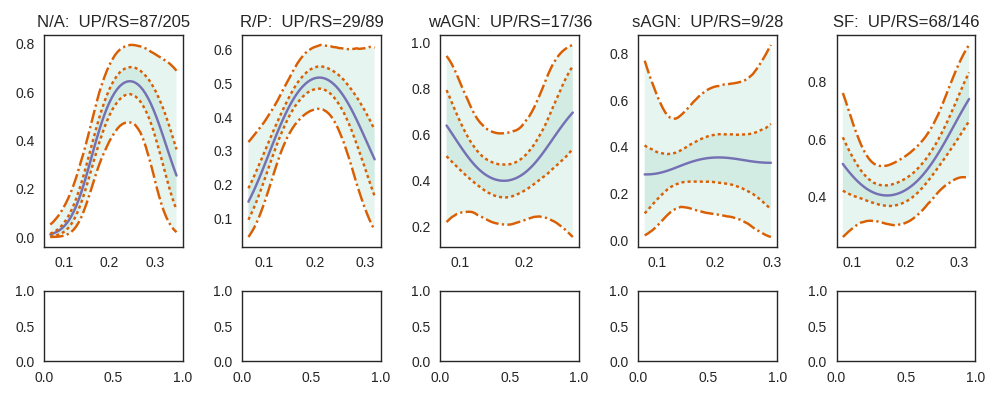

In [69]:
fig = plt.figure(figsize=(10,4))
gs  = GridSpec(2,5, height_ratios=[3, 1], width_ratios=[1,1,1,1,1])

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[0,3])
ax4 = fig.add_subplot(gs[0,4])
box0 = fig.add_subplot(gs[1,0])
box1 = fig.add_subplot(gs[1,1])
box2 = fig.add_subplot(gs[1,2])
box3 = fig.add_subplot(gs[1,3])
box4 = fig.add_subplot(gs[1,4])

# WHAN's N/A -------------------------------------------------------------------------------------------------------
## main plot -------------------------------------------------------------------------------------------------------
ax0.set_title("N/A:  %s" % gals_print[1], fontsize=12)
ax0.plot(results0_df['Z'].astype(float), results0_df['2.5%'].astype(float),  '-.', color=palette[1], label="2.5%")
ax0.plot(results0_df['Z'].astype(float), results0_df['25%'].astype(float),   ':',  color=palette[1], label="25%")
ax0.plot(results0_df['Z'].astype(float), results0_df['mean'].astype(float),  '-',  color=palette[2], label="Mean")
ax0.plot(results0_df['Z'].astype(float), results0_df['75%'].astype(float),   ':',  color=palette[1], label="75%")
ax0.plot(results0_df['Z'].astype(float), results0_df['97.5%'].astype(float), '-.', color=palette[1], label="97.5%")
### credible intervals ---------------------------------------------------------------------------------------------
ax0.fill_between(results0_df['Z'].astype(float), results0_df['25%'].astype(float), 
                 results0_df['75%'].astype(float), facecolor=palette[0], alpha=0.1)
ax0.fill_between(results0_df['Z'].astype(float), results0_df['2.5%'].astype(float), 
                 results0_df['97.5%'].astype(float), facecolor=palette[0], alpha=0.1)
## Dn4000 distribution ---------------------------------------------------------------------------------------------


# WHAN's R/P -------------------------------------------------------------------------------------------------------
## main plot -------------------------------------------------------------------------------------------------------
ax1.set_title("R/P:  %s" % gals_print[0], fontsize=12)
ax1.plot(results1_df['Z'].astype(float), results1_df['2.5%'].astype(float),  '-.', color=palette[1], label="2.5%")
ax1.plot(results1_df['Z'].astype(float), results1_df['25%'].astype(float),   ':',  color=palette[1], label="25%")
ax1.plot(results1_df['Z'].astype(float), results1_df['mean'].astype(float),  '-',  color=palette[2], label="Mean")
ax1.plot(results1_df['Z'].astype(float), results1_df['75%'].astype(float),   ':',  color=palette[1], label="75%")
ax1.plot(results1_df['Z'].astype(float), results1_df['97.5%'].astype(float), '-.', color=palette[1], label="97.5%")
### credible intervals ---------------------------------------------------------------------------------------------
ax1.fill_between(results1_df['Z'].astype(float), results1_df['25%'].astype(float), 
                 results1_df['75%'].astype(float), facecolor=palette[0], alpha=0.1)
ax1.fill_between(results1_df['Z'].astype(float), results1_df['2.5%'].astype(float), 
                 results1_df['97.5%'].astype(float), facecolor=palette[0], alpha=0.1)
## Dn4000 distribution ---------------------------------------------------------------------------------------------


# WHAN's wAGN ------------------------------------------------------------------------------------------------------
## main plot -------------------------------------------------------------------------------------------------------
ax2.set_title("wAGN:  %s" % gals_print[2], fontsize=12)
ax2.plot(results2_df['Z'].astype(float), results2_df['2.5%'].astype(float),  '-.', color=palette[1], label="2.5%")
ax2.plot(results2_df['Z'].astype(float), results2_df['25%'].astype(float),   ':',  color=palette[1], label="25%")
ax2.plot(results2_df['Z'].astype(float), results2_df['mean'].astype(float),  '-',  color=palette[2], label="Mean")
ax2.plot(results2_df['Z'].astype(float), results2_df['75%'].astype(float),   ':',  color=palette[1], label="75%")
ax2.plot(results2_df['Z'].astype(float), results2_df['97.5%'].astype(float), '-.', color=palette[1], label="97.5%")
# credible intervals:
ax2.fill_between(results2_df['Z'].astype(float), results2_df['2.5%'].astype(float), 
                 results2_df['97.5%'].astype(float), facecolor=palette[0], alpha=0.1)
ax2.fill_between(results2_df['Z'].astype(float), results2_df['25%'].astype(float), 
                 results2_df['75%'].astype(float), facecolor=palette[0], alpha=0.1)
## Dn4000 distribution ---------------------------------------------------------------------------------------------



# WHAN's sAGN ------------------------------------------------------------------------------------------------------
## main plot -------------------------------------------------------------------------------------------------------
ax3.set_title("sAGN:  %s" % gals_print[3], fontsize=12)
ax3.plot(results3_df['Z'].astype(float), results3_df['2.5%'].astype(float),  '-.', color=palette[1], label="2.5%")
ax3.plot(results3_df['Z'].astype(float), results3_df['25%'].astype(float),   ':',  color=palette[1], label="25%")
ax3.plot(results3_df['Z'].astype(float), results3_df['mean'].astype(float),  '-',  color=palette[2], label="Mean")
ax3.plot(results3_df['Z'].astype(float), results3_df['75%'].astype(float),   ':',  color=palette[1], label="75%")
ax3.plot(results3_df['Z'].astype(float), results3_df['97.5%'].astype(float), '-.', color=palette[1], label="97.5%")
# credible intervals:
ax3.fill_between(results3_df['Z'].astype(float), results3_df['2.5%'].astype(float), 
                 results3_df['97.5%'].astype(float), facecolor=palette[0], alpha=0.1)
ax3.fill_between(results3_df['Z'].astype(float), results3_df['25%'].astype(float).astype(float), 
                 results3_df['75%'].astype(float), facecolor=palette[0], alpha=0.1)

# WHAN's SF --------------------------------------------------------------------------------------------------------
## main plot -------------------------------------------------------------------------------------------------------
ax4.set_title("SF:  %s" % gals_print[4], fontsize=12)
ax4.plot(results4_df['Z'].astype(float), results4_df['2.5%'].astype(float),  '-.', color=palette[1], label="2.5%")
ax4.plot(results4_df['Z'].astype(float), results4_df['25%'].astype(float),   ':',  color=palette[1], label="25%")
ax4.plot(results4_df['Z'].astype(float), results4_df['mean'].astype(float),  '-',  color=palette[2], label="Mean")
ax4.plot(results4_df['Z'].astype(float), results4_df['75%'].astype(float),   ':',  color=palette[1], label="75%")
ax4.plot(results4_df['Z'].astype(float), results4_df['97.5%'].astype(float), '-.', color=palette[1], label="97.5%")
# credible intervals:
ax4.fill_between(results4_df['Z'].astype(float), results4_df['2.5%'].astype(float), 
                 results4_df['97.5%'].astype(float), facecolor=palette[0], alpha=0.1)
ax4.fill_between(results4_df['Z'].astype(float), results4_df['25%'].astype(float), 
                 results4_df['75%'].astype(float), facecolor=palette[0], alpha=0.1)
# # plt.xlim(xlimits)
# plt.ylim(ylimits)
# plt.tick_params('both', labelsize='13')
# plt.xticks(xticks)
# ax4.legend(loc='best', bbox_to_anchor=(0.0, -0.1), fontsize=12, frameon=True, framealpha=1., ncol=5)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


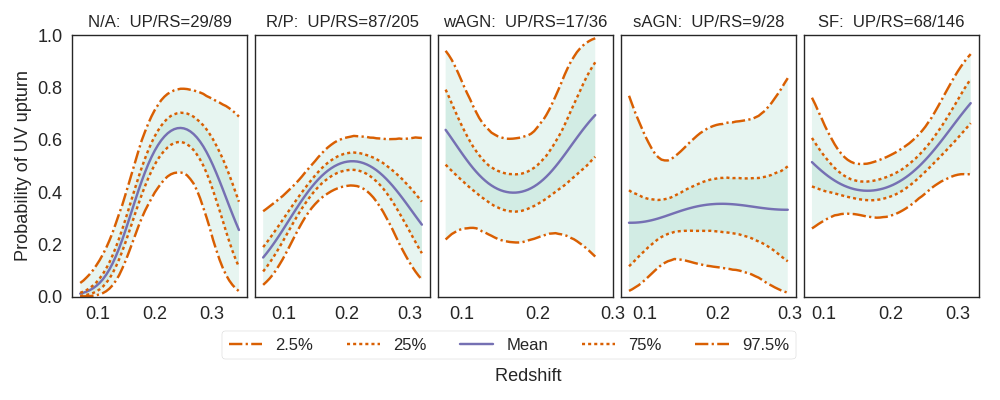

In [21]:
plt.subplots(1,5, figsize=(10,4.))

ax0 = plt.subplot(1,5,1)
plt.title("N/A:  %s" % gals_print[0], fontsize=12)
plot25, = plt.plot(results0_df['Z'].astype(float), results0_df['2.5%'].astype(float),  '-.', color=palette[1], 
                   label="2.5%")
plotq1, = plt.plot(results0_df['Z'].astype(float), results0_df['25%'].astype(float),   ':',  color=palette[1], 
                   label="25%")
plotq2, = plt.plot(results0_df['Z'].astype(float), results0_df['mean'].astype(float),  '-',  color=palette[2], 
                   label="Mean")
plotq3, = plt.plot(results0_df['Z'].astype(float), results0_df['75%'].astype(float),   ':',  color=palette[1], 
                   label="75%")
plot97, = plt.plot(results0_df['Z'].astype(float), results0_df['97.5%'].astype(float), '-.', color=palette[1], 
                   label="97.5%")
# credible intervals:
plt.fill_between(results0_df['Z'].astype(float), results0_df['25%'].astype(float), 
                 results0_df['75%'].astype(float), facecolor=palette[0], alpha=0.1)
plt.fill_between(results0_df['Z'].astype(float), results0_df['2.5%'].astype(float), 
                 results0_df['97.5%'].astype(float), facecolor=palette[0], alpha=0.1)
# plt.xlim(xlimits)
plt.ylim(ylimits)
plt.ylabel("Probability of UV upturn", fontsize=13)
# plt.legend(numpoints=1, loc='lower right', fontsize=12, frameon=True, framealpha=1.)
plt.tick_params('both', labelsize='13')
plt.xticks(xticks)


ax1=plt.subplot(1,5,2, sharey=ax0)
ax1.yaxis.set_visible(False)
plt.title("R/P:  %s" % gals_print[1], fontsize=12)
plot25, = plt.plot(results1_df['Z'].astype(float), results1_df['2.5%'].astype(float),  '-.', color=palette[1], 
                   label="2.5%")
plotq1, = plt.plot(results1_df['Z'].astype(float), results1_df['25%'].astype(float),   ':',  color=palette[1], 
                   label="25%")
plotq2, = plt.plot(results1_df['Z'].astype(float), results1_df['mean'].astype(float),  '-',  color=palette[2], 
                   label="Mean")
plotq3, = plt.plot(results1_df['Z'].astype(float), results1_df['75%'].astype(float),   ':',  color=palette[1], 
                   label="75%")
plot97, = plt.plot(results1_df['Z'].astype(float), results1_df['97.5%'].astype(float), '-.', color=palette[1], 
                   label="97.5%")
# credible intervals:
plt.fill_between(results1_df['Z'].astype(float), results1_df['2.5%'].astype(float), 
                 results1_df['97.5%'].astype(float), facecolor=palette[0], alpha=0.1)
plt.fill_between(results1_df['Z'].astype(float), results1_df['25%'].astype(float), 
                 results1_df['75%'].astype(float), facecolor=palette[0], alpha=0.1)
# plt.xlim(xlimits)
plt.ylim(ylimits)
# plt.legend(numpoints=1, loc='lower right', fontsize=12, frameon=True, framealpha=1.)
plt.tick_params('both', labelsize='13')
plt.xticks(xticks)

          
ax2=plt.subplot(1,5,3, sharey=ax0)
ax2.yaxis.set_visible(False)
plt.title("wAGN:  %s" % gals_print[2], fontsize=12)
plot25, = plt.plot(results2_df['Z'].astype(float), results2_df['2.5%'].astype(float),  '-.', color=palette[1], 
                   label="2.5%")
plotq1, = plt.plot(results2_df['Z'].astype(float), results2_df['25%'].astype(float),   ':',  color=palette[1], 
                   label="25%")
plotq2, = plt.plot(results2_df['Z'].astype(float), results2_df['mean'].astype(float),  '-',  color=palette[2], 
                   label="Mean")
plotq3, = plt.plot(results2_df['Z'].astype(float), results2_df['75%'].astype(float),   ':',  color=palette[1], 
                   label="75%")
plot97, = plt.plot(results2_df['Z'].astype(float), results2_df['97.5%'].astype(float), '-.', color=palette[1], 
                   label="97.5%")
# credible intervals:
plt.fill_between(results2_df['Z'].astype(float), results2_df['2.5%'].astype(float), 
                 results2_df['97.5%'].astype(float), facecolor=palette[0], alpha=0.1)
plt.fill_between(results2_df['Z'].astype(float), results2_df['25%'].astype(float), 
                 results2_df['75%'].astype(float), facecolor=palette[0], alpha=0.1)
# plt.xlim(xlimits)
plt.ylim(ylimits)
plt.xlabel("\n \n Redshift", fontsize=13)
plt.tick_params('both', labelsize='13')
# ax2.xaxis.set_label_position('top') 
plt.xticks(xticks)
          

ax3=plt.subplot(1,5,4, sharey=ax0)
ax3.yaxis.set_visible(False)
plt.title("sAGN:  %s" % gals_print[3], fontsize=12)
plot25, = plt.plot(results3_df['Z'].astype(float), results3_df['2.5%'].astype(float),  '-.', color=palette[1], 
                   label="2.5%")
plotq1, = plt.plot(results3_df['Z'].astype(float), results3_df['25%'].astype(float),   ':',  color=palette[1], 
                   label="25%")
plotq2, = plt.plot(results3_df['Z'].astype(float), results3_df['mean'].astype(float),  '-',  color=palette[2], 
                   label="Mean")
plotq3, = plt.plot(results3_df['Z'].astype(float), results3_df['75%'].astype(float),   ':',  color=palette[1], 
                   label="75%")
plot97, = plt.plot(results3_df['Z'].astype(float), results3_df['97.5%'].astype(float), '-.', color=palette[1], 
                   label="97.5%")
# credible intervals:
plt.fill_between(results3_df['Z'].astype(float), results3_df['2.5%'].astype(float), 
                 results3_df['97.5%'].astype(float), facecolor=palette[0], alpha=0.1)
plt.fill_between(results3_df['Z'].astype(float), results3_df['25%'].astype(float).astype(float), 
                 results3_df['75%'].astype(float), facecolor=palette[0], alpha=0.1)
# plt.xlim(xlimits)
plt.ylim(ylimits)
plt.tick_params('both', labelsize='13')
plt.xticks(xticks)

ax4=plt.subplot(1,5,5, sharey=ax0)
ax4.yaxis.set_visible(False)
plt.title("SF:  %s" % gals_print[4], fontsize=12)
plot25, = plt.plot(results4_df['Z'].astype(float), results4_df['2.5%'].astype(float),  '-.', color=palette[1], 
                   label="2.5%")
plotq1, = plt.plot(results4_df['Z'].astype(float), results4_df['25%'].astype(float),   ':',  color=palette[1], 
                   label="25%")
plotq2, = plt.plot(results4_df['Z'].astype(float), results4_df['mean'].astype(float),  '-',  color=palette[2], 
                   label="Mean")
plotq3, = plt.plot(results4_df['Z'].astype(float), results4_df['75%'].astype(float),   ':',  color=palette[1], 
                   label="75%")
plot97, = plt.plot(results4_df['Z'].astype(float), results4_df['97.5%'].astype(float), '-.', color=palette[1], 
                   label="97.5%")
# credible intervals:
plt.fill_between(results4_df['Z'].astype(float), results4_df['2.5%'].astype(float), 
                 results4_df['97.5%'].astype(float), facecolor=palette[0], alpha=0.1)
plt.fill_between(results4_df['Z'].astype(float), results4_df['25%'].astype(float), 
                 results4_df['75%'].astype(float), facecolor=palette[0], alpha=0.1)
# plt.xlim(xlimits)
plt.ylim(ylimits)
plt.tick_params('both', labelsize='13')
plt.xticks(xticks)
ax4.legend(loc='best', bbox_to_anchor=(0.0, -0.1), fontsize=12, frameon=True, framealpha=1., ncol=5)

plt.tight_layout(w_pad=-1.2)
plt.savefig('./Results/model_with_emlines.png')
plt.savefig('./Results/model_with_emlines.pdf')
plt.show()